In [13]:
import keras
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import json

In [14]:
with open('OpenPosetrain.json') as f:
  file = json.load(f)

In [15]:
data = file['data']
x_train =[]
y_train = []

def labelToNumerical(label):
    if label == 'WarriorPoseI':
        return 0
    if label == 'WarriorPoseII':
        return 1
    if label == 'WarriorPoseIII':
        return 2
    if label == 'TreePose':
        return 3

i = 0
for i in range(len(data)):
    kpsArr = []
    labels = []
    for kps in data[i]['xs'].items():
        kpsArr.append(kps[1])
    for label in data[i]['ys'].items():
        labels.append(labelToNumerical(label[1]))
    x_train.append(kpsArr)
    y_train.append(labels)
    

In [16]:
print(x_train[0])
x_train = np.asarray(x_train)
print(x_train.shape)
print(x_train[0])

[212.5, 95.0, 225.0, 115.0, 218.75, 115.0, 0, 0, 0, 0, 237.5, 115.0, 243.75, 100.0, 231.25, 85.0, 225.0, 170.0, 243.75, 180.0, 331.25, 235.0, 231.25, 170.0, 181.25, 190.0, 187.5, 235.0, 0, 0, 212.5, 90.0, 0, 0, 225.0, 95.0]
(592, 36)
[212.5   95.   225.   115.   218.75 115.     0.     0.     0.     0.
 237.5  115.   243.75 100.   231.25  85.   225.   170.   243.75 180.
 331.25 235.   231.25 170.   181.25 190.   187.5  235.     0.     0.
 212.5   90.     0.     0.   225.    95.  ]


In [17]:
print(y_train[0])
y_train = np.asarray(y_train)
print(y_train.shape)
print(y_train[0])

[0]
(592, 1)
[0]


In [18]:
y_cat_train = to_categorical(y_train,4)

In [19]:
y_cat_train[0]

array([1., 0., 0., 0.], dtype=float32)

# Building the model

In [37]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

model = Sequential()

model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

hist = model.fit(x_train, y_cat_train, validation_split=0.2, verbose=1, epochs=100)

Train on 473 samples, validate on 119 samples
Epoch 1/100
473/473 [==============================] - 0s 232us/step - loss: 184.1713 - accuracy: 0.4080 - val_loss: 54.1353 - val_accuracy: 0.0000e+00
Epoch 2/100
473/473 [==============================] - 0s 32us/step - loss: 103.6849 - accuracy: 0.4841 - val_loss: 58.8203 - val_accuracy: 0.0000e+00
Epoch 3/100
473/473 [==============================] - 0s 32us/step - loss: 38.0662 - accuracy: 0.6131 - val_loss: 29.9851 - val_accuracy: 0.0000e+00
Epoch 4/100
473/473 [==============================] - 0s 32us/step - loss: 17.7704 - accuracy: 0.6808 - val_loss: 18.5303 - val_accuracy: 0.0000e+00
Epoch 5/100
473/473 [==============================] - 0s 32us/step - loss: 9.0818 - accuracy: 0.7400 - val_loss: 24.6571 - val_accuracy: 0.0000e+00
Epoch 6/100
473/473 [==============================] - 0s 34us/step - loss: 4.9066 - accuracy: 0.7400 - val_loss: 17.1296 - val_accuracy: 0.0000e+00
Epoch 7/100
473/473 [==============================] 

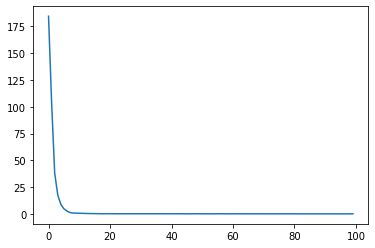

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(hist.history['loss'])


In [12]:
model.save('test.h5')